### Task 1

In [26]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt  

fx = pd.read_csv(r"C:\Users\Hp Envy\Downloads\data_safe_copy (1).csv")

fx["Date"] = pd.to_datetime(fx["Date"])
fx = fx.set_index("Date")
print(fx.index.is_monotonic_increasing) # ascending order

for col in fx.columns:
    print(col, is_numeric_dtype(fx[col]))
    
print(fx.head()) # the first five rows
print(fx.tail()) # the last five rows

True
EURUSD True
GBPUSD True
PLNUSD True
USDPLN True
USDJPY True
AUDUSD True
NZDUSD True
USDCAD True
USDCHF True
EURPLN True
GBPPLN True
             EURUSD   GBPUSD    PLNUSD   USDPLN    USDJPY   AUDUSD   NZDUSD  \
Date                                                                          
2025-01-02  1.02661  1.23826  0.240270  4.16199  157.4610  0.62033  0.55966   
2025-01-03  1.03062  1.24267  0.241453  4.14160  157.3420  0.62176  0.56089   
2025-01-06  1.03900  1.25188  0.244290  4.09350  157.6200  0.62427  0.56402   
2025-01-07  1.03426  1.24771  0.242804  4.11855  158.0405  0.62326  0.56331   
2025-01-08  1.03185  1.23638  0.241377  4.14290  158.3085  0.62132  0.56058   

             USDCAD   USDCHF   EURPLN   GBPPLN  
Date                                            
2025-01-02  1.44067  0.91210  4.27274  5.15363  
2025-01-03  1.44467  0.90891  4.26841  5.14664  
2025-01-06  1.43330  0.90478  4.25315  5.12457  
2025-01-07  1.43683  0.90937  4.25965  5.13875  
2025-01-08  1.4

### Task 2

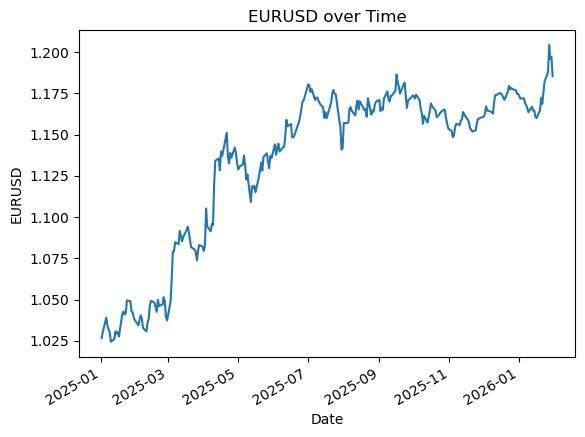

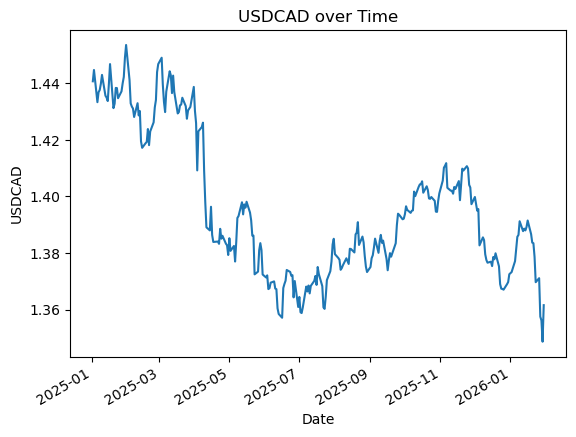

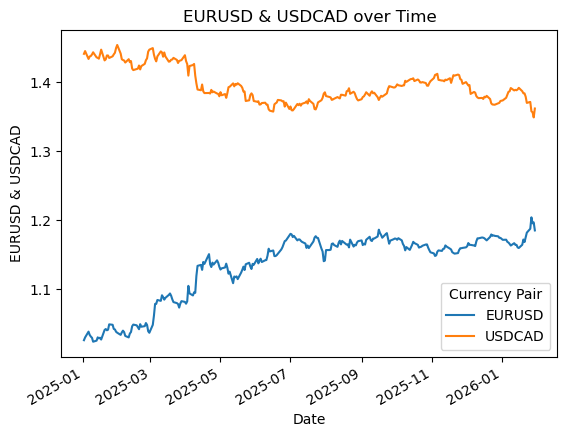

In [28]:
currency_pair_1 = fx["EURUSD"]
currency_pair_2 = fx["USDCAD"]

line_plot_1 = currency_pair_1.plot(kind = "line")
line_plot_1.set_xlabel("Date")    # x-axis label
line_plot_1.set_ylabel("EURUSD")  # y-axis label
line_plot_1.set_title("EURUSD over Time") # title
plt.show()

line_plot_2 = currency_pair_2.plot(kind = "line")
line_plot_2.set_xlabel("Date")    # x-axis label
line_plot_2.set_ylabel("USDCAD")  # y-axis label
line_plot_2.set_title("USDCAD over Time") # title
plt.show()

combined = fx[["EURUSD","USDCAD"]]
line_plot_combined = combined.plot(kind = "line")
line_plot_combined.set_xlabel("Date")    # x-axis label
line_plot_combined.set_ylabel("EURUSD & USDCAD")  # y-axis label
line_plot_combined.set_title("EURUSD & USDCAD over Time") # title
line_plot_combined.legend(title="Currency Pair")
plt.show()

### Task 3

In [29]:
roll = pair_3.rolling(window=7) 
rolling_mean = roll.mean() # 7‑day rolling mean
rolling_mean.head(10) 
rolling_std = roll.std() # 7‑day rolling standard deviation
rolling_std.head(10)

print(rolling_mean.isna().head(10))  # first 10 rows
print(rolling_std.isna().head(10)) 

            EURUSD  USDCAD
Date                      
2025-01-02    True    True
2025-01-03    True    True
2025-01-06    True    True
2025-01-07    True    True
2025-01-08    True    True
2025-01-09    True    True
2025-01-10   False   False
2025-01-13   False   False
2025-01-14   False   False
2025-01-15   False   False
            EURUSD  USDCAD
Date                      
2025-01-02    True    True
2025-01-03    True    True
2025-01-06    True    True
2025-01-07    True    True
2025-01-08    True    True
2025-01-09    True    True
2025-01-10   False   False
2025-01-13   False   False
2025-01-14   False   False
2025-01-15   False   False


### Task 4

In [30]:
fx["baseline_pred"] =  fx["GBPPLN"].shift(1)
fx["abs_error"] = (fx["GBPPLN"] - fx["baseline_pred"]).abs() # absolute error between the actual value and the baseline prediction
fx
mean_abs_err = fx["abs_error"].mean() # mean absolute error 
print(mean_abs_err)
print(fx["baseline_pred"].notna().sum()==len(fx)-1)

0.013626164874551972
True


### Task 5

In [35]:
Date_range = (fx.index.min(), fx.index.max())

report = {"currency_pairs":["EURUSD", "USDCAD"],
          "rolling_window_size":roll.window, 
          "mean_absolute_error":mean_abs_err,
          "date_range": Date_range}
print(report)
print(roll.window == report["rolling_window_size"])

{'currency_pairs': ['EURUSD', 'USDCAD'], 'rolling_window_size': 7, 'mean_absolute_error': np.float64(0.013626164874551972), 'date_range': (Timestamp('2025-01-02 00:00:00'), Timestamp('2026-01-30 00:00:00'))}
True
